In [1]:
import numpy as np
from scipy.special import expit
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import csv

# Part a

In [2]:
def gass_hermite_quad(f, degree):
    '''
    Calculate the integral (1) numerically.
    :param f: target function, takes a array as input x = [x0, x1,...,xn], and return a array of function values f(x) = [f(x0),f(x1), ..., f(xn)]
    :param degree: integer, >=1, number of points
    :return:
    '''
    points, weights = np.polynomial.hermite.hermgauss(degree)
    #function values at given points
    f_x = f(points)
    #weighted sum of function values
    F = np.sum( f_x  * weights)
    return F

In [3]:
def p(x):
    return(np.exp(-x*x)*expit(10*x + 3))

In [4]:
def p_sigmoid(x):
    return(expit(10*x + 3))


Gauss-Hermite Quadrature approximation : 
Normalisation Constant:  1.16882628660156


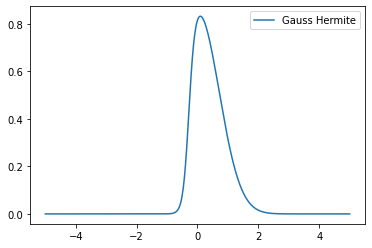

In [5]:
print("=====================================================================\n")
print("Gauss-Hermite Quadrature approximation : ")
degree = 100
x = np.linspace(-5, 5, 500)
F = gass_hermite_quad(p_sigmoid, degree=degree)
y = p(x)/F
print("Normalisation Constant: ", F)
plt.plot(x,y,label="Gauss Hermite")
plt.legend()
plt.show()

# Part b

In [6]:
def neg_log(x):
    y = -x*x + np.log(expit(10*x+3))
    return(-y)

def gaussian(mean, std, x):
    return(norm.pdf(x, loc = mean, scale=std))

In [7]:
def laplace_approx(x):
    res = minimize(neg_log, np.array(0))
    mean = (res.x)
    sigmoid = expit(10*mean+3)
    var =  1/(2 + 100 * sigmoid*(1-sigmoid))
    y = gaussian(mean, math.sqrt(var), x)
    print(("Mean : {}, variance : {}").format(mean, var))
    return(y)

Mean : [0.0947181], variance : [0.25917188]
Normalisation Constant:  1.16882628660156


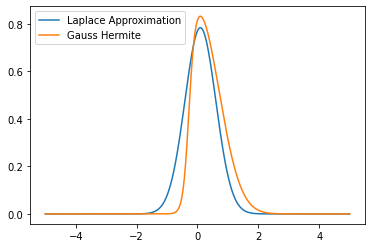

In [8]:
x = np.linspace(-5, 5, 500)
y_laplace = laplace_approx(x)
print("Normalisation Constant: ", F)
plt.plot(x,y_laplace,label="Laplace Approximation")
plt.plot(x,y,label="Gauss Hermite")
plt.legend()
plt.show()

# Part c

In [11]:
def get_lambda(xi):
    lamb = -(1/(2*(xi*10+3)))*(expit(10*xi+3) - 0.5)
    return lamb

def compute_var_local_inference(x):
    xi = 0
    degree = 100
    Z1 = gass_hermite_quad(p_sigmoid, degree)
    def get_sigmod_y(x):

        lamb = get_lambda(xi)
        sigmoid_y = expit(10*xi+3) * np.exp(5 * (x - xi) + lamb * np.multiply(10*(x-xi), 10*(x+xi)+6))
        return sigmoid_y

    for i in range(100):
        qx = get_sigmod_y(x)*np.exp(-x*x)/Z1
        xi = x[np.argmax(qx)]
    return qx

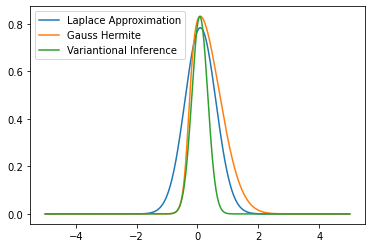

In [12]:
x = np.linspace(-5, 5, 500)
y_inf = compute_var_local_inference(x)
plt.plot(x,y_laplace,label="Laplace Approximation")
plt.plot(x,y,label="Gauss Hermite")
plt.plot(x,y_inf,label="Variantional Inference")
plt.legend()
plt.show()